In [269]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns


In [270]:
#- Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

### Dataset Description:
- RAVDESS. This dataset includes around 1500 audio file input from 24 different actors. 12 male and 12 female where these actors record short audios in 8 different emotions i.e 1 = neutral, 2 = calm, 3 = happy, 4 = sad, 5 = angry, 6 = fearful, 7 = disgust, 8 = surprised.
- Each audio file is named in such a way that the 7th character is consistent with the different emotions that they represent.

In [271]:
#- Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#- Emotions to observe
observed_emotions=['happy', 'sad', 'angry','fearful','calm','neutral']

In [272]:
li = glob.glob('speech-emotion-recognition-ravdess-data//Actor_*//*.wav')

In [273]:
"hello-world-machine".split('-')[2]

'machine'

In [274]:
print(len(li))

1440


In [275]:
li[0]

'speech-emotion-recognition-ravdess-data/Actor_20/03-01-02-02-01-02-20.wav'

In [277]:
emotions['02']

'calm'

In [278]:
# Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('speech-emotion-recognition-ravdess-data//Actor_*//*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    print(len(x))
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [280]:
#- Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

1056


In [281]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-753.903564,58.697540,22.190947,23.483717,2.261500,5.511842,-5.610104,1.401128,7.174681,5.859857,...,0.000002,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,8.673883e-07,6.387770e-07,2.753891e-07
1,-708.847046,46.317905,-7.616024,12.254804,-2.071856,-15.850799,-19.631052,-3.644379,-0.173876,-5.059706,...,0.000007,0.000008,0.000011,0.000008,0.000010,0.000009,0.000013,8.914263e-06,3.816886e-06,4.165867e-06
2,-434.918243,39.027271,-12.455023,2.949124,-9.011634,-2.080880,-1.698096,-8.712143,-0.857271,-3.776086,...,0.002079,0.001941,0.001807,0.001911,0.002072,0.001470,0.001210,4.999317e-04,3.561951e-04,1.502130e-04
3,-502.958099,39.657391,-10.176451,7.423949,-3.269854,-7.004786,-12.901738,-17.004301,-11.487122,2.437736,...,0.001392,0.000727,0.000775,0.000628,0.000413,0.000428,0.000385,1.653953e-04,1.167815e-04,7.066256e-05
4,-461.681396,29.723816,-23.741978,7.408719,-11.339372,-6.834982,-3.726737,-8.230829,1.673163,-2.040044,...,0.000504,0.000493,0.000419,0.000427,0.000517,0.000508,0.000429,2.817209e-04,1.861213e-04,9.623745e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,-717.240356,63.731388,2.225929,15.644918,4.033844,-2.028955,-5.899800,-5.539160,-7.947823,2.182504,...,0.000005,0.000003,0.000002,0.000003,0.000003,0.000003,0.000003,1.854591e-06,1.289050e-06,6.484481e-07
788,-658.863525,64.386353,0.626828,16.827145,3.291239,-2.699481,-9.383718,-3.546461,-4.032407,1.611793,...,0.000011,0.000005,0.000003,0.000002,0.000004,0.000002,0.000003,4.258365e-06,1.442966e-06,7.125711e-07
789,-562.096863,56.422756,-5.834606,17.935446,-2.309973,-4.761283,-4.715704,-11.826902,-2.034873,-1.602894,...,0.000350,0.000177,0.000122,0.000160,0.000106,0.000080,0.000086,9.647800e-05,5.626846e-05,3.778785e-05
790,-664.598145,63.108654,6.817679,23.232924,-2.679262,7.699213,-6.134918,-1.753741,-1.201036,1.209462,...,0.000012,0.000009,0.000008,0.000013,0.000016,0.000008,0.000006,3.525044e-06,8.850585e-07,4.485153e-07


In [282]:
y_test=pd.DataFrame(y_test)

In [283]:
y_test[0].value_counts()

fearful    51
calm       50
sad        50
angry      47
happy      44
neutral    22
Name: 0, dtype: int64

In [284]:
y_test = list(y_test.values)

In [285]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(792, 264)


In [286]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [287]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [288]:
y_pred=model.predict(x_test)

In [289]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

In [290]:
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 49.62%


In [291]:
from sklearn.metrics import confusion_matrix

In [292]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)

In [293]:
cm

array([[37,  1,  0,  6,  0,  3],
       [ 0, 24,  0,  5,  0, 21],
       [10,  1,  8, 15,  1, 16],
       [ 9,  1,  0, 28,  0,  6],
       [ 4,  7,  0,  3,  1,  7],
       [ 3,  8,  0,  5,  1, 33]])

In [294]:
y_test=pd.DataFrame(y_test)

In [295]:
y_test[0].value_counts()

fearful    51
calm       50
sad        50
angry      47
happy      44
neutral    22
Name: 0, dtype: int64

In [296]:
37+5+1  #- column 1

43

In [297]:
37+2+6   #- row 1  - emotion angry   37 

45

In [298]:
5+36+12

53

<AxesSubplot:>

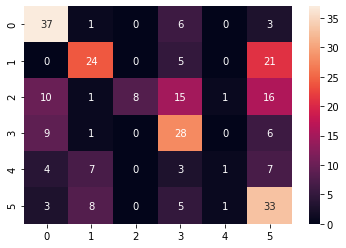

In [299]:
sns.heatmap(cm,annot=True)

In [300]:
model.score(x_test,y_test)

0.4962121212121212

In [301]:
import warnings
warnings.filterwarnings('ignore')

In [302]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [303]:
network = models.Sequential()
network.add(layers.Dense(180, activation='relu', input_shape=(180,)))
network.add(layers.Dense(10, activation='relu', input_shape=(180,)))
network.add(layers.Dense(10, activation='relu', input_shape=(10,)))
network.add(layers.Dense(10, activation='relu', input_shape=(10,)))
network.add(layers.Dense(10, activation='relu', input_shape=(10,)))
network.add(layers.Dense(10, activation='relu', input_shape=(10,)))
network.add(layers.Dense(6, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [304]:
from sklearn.preprocessing import LabelEncoder

In [305]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 180)               32580     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1810      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 6)                

In [306]:
y_train = LabelEncoder().fit_transform(y_train)

In [307]:
y_train

array([1, 1, 0, 3, 3, 1, 0, 3, 1, 1, 0, 1, 0, 2, 5, 3, 5, 2, 3, 2, 0, 5,
       1, 0, 4, 0, 3, 5, 0, 4, 4, 5, 4, 5, 1, 3, 5, 3, 2, 1, 0, 2, 2, 2,
       5, 2, 5, 2, 0, 1, 5, 3, 3, 3, 2, 3, 1, 2, 1, 1, 2, 3, 1, 0, 5, 2,
       2, 5, 3, 2, 0, 1, 1, 0, 1, 3, 4, 5, 0, 4, 3, 3, 5, 3, 5, 2, 3, 3,
       4, 0, 5, 5, 2, 4, 5, 3, 1, 3, 2, 0, 3, 5, 0, 0, 1, 5, 2, 1, 1, 5,
       2, 5, 1, 2, 0, 0, 4, 0, 1, 2, 5, 0, 2, 1, 0, 4, 2, 1, 1, 5, 4, 1,
       4, 1, 0, 1, 1, 5, 3, 1, 3, 2, 3, 2, 5, 1, 1, 1, 2, 2, 3, 5, 3, 1,
       2, 1, 5, 0, 0, 3, 1, 1, 4, 3, 3, 3, 0, 1, 2, 5, 4, 0, 5, 4, 1, 1,
       2, 5, 5, 3, 5, 5, 3, 3, 4, 0, 2, 2, 5, 2, 2, 0, 3, 1, 3, 0, 0, 3,
       4, 5, 5, 3, 0, 3, 5, 0, 2, 0, 4, 0, 0, 1, 1, 5, 0, 2, 1, 2, 5, 5,
       5, 5, 2, 3, 5, 0, 0, 4, 0, 5, 0, 1, 2, 1, 2, 3, 4, 5, 1, 0, 0, 4,
       0, 2, 0, 0, 5, 1, 1, 0, 3, 4, 3, 2, 4, 1, 0, 5, 1, 0, 5, 1, 2, 2,
       0, 1, 5, 3, 5, 2, 1, 3, 2, 5, 2, 2, 2, 3, 1, 0, 2, 3, 2, 0, 5, 1,
       0, 0, 2, 1, 2, 4, 3, 1, 0, 0, 0, 2, 0, 3, 3,

In [308]:
y_train = to_categorical(y_train)

In [309]:
y_test = LabelEncoder().fit_transform(y_test)

In [310]:
y_test = to_categorical(y_test)

In [311]:
network.fit(x_train, y_train, epochs=300, batch_size=32)


Epoch 1/300
25/25 [==============================] - 0s 6ms/step - loss: 4.0412 - accuracy: 0.1806
Epoch 2/300
25/25 [==============================] - 0s 5ms/step - loss: 1.9025 - accuracy: 0.1566
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 1.7976 - accuracy: 0.1995
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 1.7818 - accuracy: 0.2260
Epoch 5/300
25/25 [==============================] - 0s 6ms/step - loss: 1.7715 - accuracy: 0.2601
Epoch 6/300
25/25 [==============================] - 0s 7ms/step - loss: 1.7551 - accuracy: 0.2513
Epoch 7/300
25/25 [==============================] - 0s 5ms/step - loss: 1.7389 - accuracy: 0.2475
Epoch 8/300
25/25 [==============================] - 0s 4ms/step - loss: 1.7201 - accuracy: 0.2525
Epoch 9/300
25/25 [==============================] - 0s 3ms/step - loss: 1.7288 - accuracy: 0.2449
Epoch 10/300
25/25 [==============================] - 0s 4ms/step - loss: 1.6880 - accuracy: 0.2639
Epoch 11/

25/25 [==============================] - 0s 5ms/step - loss: 1.0431 - accuracy: 0.5518
Epoch 84/300
25/25 [==============================] - 0s 4ms/step - loss: 1.1185 - accuracy: 0.5139
Epoch 85/300
25/25 [==============================] - 0s 6ms/step - loss: 1.0534 - accuracy: 0.5455
Epoch 86/300
25/25 [==============================] - 0s 5ms/step - loss: 1.0415 - accuracy: 0.5505
Epoch 87/300
25/25 [==============================] - 0s 4ms/step - loss: 1.0296 - accuracy: 0.5581
Epoch 88/300
25/25 [==============================] - 0s 5ms/step - loss: 1.0229 - accuracy: 0.5505
Epoch 89/300
25/25 [==============================] - 0s 16ms/step - loss: 1.0029 - accuracy: 0.5682
Epoch 90/300
25/25 [==============================] - 0s 9ms/step - loss: 1.0321 - accuracy: 0.5467
Epoch 91/300
25/25 [==============================] - 0s 4ms/step - loss: 1.0318 - accuracy: 0.5619
Epoch 92/300
25/25 [==============================] - 0s 4ms/step - loss: 1.0072 - accuracy: 0.5833
Epoch 93/300

25/25 [==============================] - 0s 6ms/step - loss: 0.6213 - accuracy: 0.7336
Epoch 246/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8086 - accuracy: 0.6755
Epoch 247/300
25/25 [==============================] - 0s 5ms/step - loss: 0.8721 - accuracy: 0.6402
Epoch 248/300
25/25 [==============================] - 0s 4ms/step - loss: 0.6330 - accuracy: 0.7197
Epoch 249/300
25/25 [==============================] - 0s 4ms/step - loss: 0.5715 - accuracy: 0.7576
Epoch 250/300
25/25 [==============================] - 0s 4ms/step - loss: 0.5867 - accuracy: 0.7462
Epoch 251/300
25/25 [==============================] - 0s 5ms/step - loss: 0.5645 - accuracy: 0.7652
Epoch 252/300
25/25 [==============================] - 0s 12ms/step - loss: 0.6384 - accuracy: 0.7424
Epoch 253/300
25/25 [==============================] - 0s 6ms/step - loss: 0.6704 - accuracy: 0.7008
Epoch 254/300
25/25 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.7083
Epo

In [313]:
test = x_test[0].T

In [314]:
test.shape

(180,)

In [315]:
happy =[]
angry = []
sad = []
fearful=[]
calm=[]
neutral=[]
for file in glob.glob('speech-emotion-recognition-ravdess-data//Actor_*//*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        if emotion =='happy':
            happy.append(file)
        elif emotion=='angry':
            angry.append(file)
        elif emotion=='sad':
            sad.append(file)
        elif emotion=='fearful':
            fearful.append(file)
        elif emotion=='calm':
            calm.append(file)
        elif emotion=='neutral':
            neutral.append(file)
            
            
print("There are "+str(len(happy))+" files with happy emotion")
print("There are "+str(len(angry))+" files with angry emotion")
print("There are "+str(len(sad))+" files with sad emotion")
print("There are "+str(len(fearful))+" files with fearful emotion")
print("There are "+str(len(calm))+" files with calm emotion")
print("There are "+str(len(neutral))+" files with neutral emotion")


There are 192 files with happy emotion
There are 192 files with angry emotion
There are 192 files with sad emotion
There are 192 files with fearful emotion
There are 192 files with calm emotion
There are 96 files with neutral emotion


### Get the predictions using model 

In [316]:
all_emotions={'01':'neutral', '02':'calm', '03':'happy', '04':'sad', '05':'angry', '06':'fearful', '07':'disgust', '08':'surprised'}

In [317]:
file_name

'03-01-07-02-02-01-06.wav'

## Filename identifiers 

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the ‘neutral’ emotion.
- Statement (01 = “Kids are talking by the door”, 02 = “Dogs are sitting by the door”).
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

### select any file having happy emotion from list happy

In [318]:
file = happy[100]   ## selecting 100th file from happylist
file_name=os.path.basename(file)
emotion=all_emotions[file_name.split("-")[2]]
print(file_name)
print("Actual Emotion:",emotion)

03-01-03-01-01-02-23.wav
Actual Emotion: happy


In [319]:
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)
pred = np.argmax(network.predict(temp))
emotions = {0:'angry',1:'calm',2:'fearful',3:'happy',4:'neutral',5:'sad'}
print("Predicted Emotion "+emotions[(pred)])

Predicted Emotion happy


In [320]:
observed_emotions

['happy', 'sad', 'angry', 'fearful', 'calm', 'neutral']

### select any file having sad emotion from list sad

In [321]:
file = sad[60]                                      ## selecting 50th file from sadlist
file_name=os.path.basename(file)
emotion=all_emotions[file_name.split("-")[2]]
print(file_name)
print("Actual Emotion:",emotion)

03-01-04-02-01-01-08.wav
Actual Emotion: sad


In [322]:
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)
pred = np.argmax(network.predict(temp))
print("Predicted Emotion "+emotions[(pred)])

Predicted Emotion fearful


### select any file having angry emotion from list angry

## INPUT FILE EMOTION

In [323]:
file = angry[75]   ## selecting 75th file from angrylist
file_name=os.path.basename(file)
emotion=all_emotions[file_name.split("-")[2]]    ## 3rd number in the file name represent emotion 
print(file_name)
print("Actual Emotion:",emotion)

03-01-05-02-01-01-16.wav
Actual Emotion: angry


## Angry

In [324]:
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)

##  PREDICTION

In [325]:
pred = np.argmax(network.predict(temp))
print("Predicted Emotion "+emotions[(pred)])

Predicted Emotion angry


## OUTPUT : Angry 

### Fearful

In [326]:
file = fearful[75]   ## selecting 75th file from fearful
file_name=os.path.basename(file)
emotion=all_emotions[file_name.split("-")[2]]    ## 3rd number in the file name represent emotion 
print(file_name)
print("Actual Emotion:",emotion)

03-01-06-02-01-02-16.wav
Actual Emotion: fearful


## Fearful

In [327]:
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)

##  PREDICTION

In [328]:
pred = np.argmax(network.predict(temp))
print("Predicted Emotion "+emotions[(pred)])

Predicted Emotion fearful


### Calm

In [329]:
file = calm[50]   ## selecting 50th file from calm
file_name=os.path.basename(file)
emotion=all_emotions[file_name.split("-")[2]]    ## 3rd number in the file name represent emotion 
print(file_name)
print("Actual Emotion:",emotion)

03-01-02-02-01-02-18.wav
Actual Emotion: calm


## Calm

In [330]:
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)

##  PREDICTION

In [331]:
pred = np.argmax(network.predict(temp))
print("Predicted Emotion "+emotions[(pred)])

Predicted Emotion calm


### Neutral

In [332]:
file = neutral[40]   ## selecting 50th file from neutral
file_name=os.path.basename(file)
emotion=all_emotions[file_name.split("-")[2]]    ## 3rd number in the file name represent emotion 
print(file_name)
print("Actual Emotion:",emotion)

03-01-01-01-02-02-14.wav
Actual Emotion: neutral


## Neutral

In [333]:
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)

##  PREDICTION

In [334]:
pred = np.argmax(network.predict(temp))
print("Predicted Emotion "+emotions[(pred)])

Predicted Emotion neutral


we can see that our model is able to identify the emotions in the audio files

### Testing it on the Live Audio

In [2]:

import sounddevice as sd
import soundfile as sf

In [1]:

def Voice_rec():
	fs = 48000
	
	# seconds
	duration = 5
	myrecording = sd.rec(int(duration * fs),
						samplerate=fs, channels=2)
	sd.wait()
	
	# Save as FLAC file at correct sampling rate
	return sf.write('recorder_Audio_file.wav', myrecording, fs)  # save the recording 

## Sentence 1

"Dogs are sitting by the door"

## Sentence 2

"Kids are talking by the door"

In [ ]:
Voice_rec()    ## run this cell to record voice 

In [ ]:
file = r'recorder_Audio_file.wav'           ### test with recorded file 
feat=extract_feature(file, mfcc=True, chroma=True, mel=True)
temp = feat.reshape(1, 180)
pred = np.argmax(network.predict(temp))
emotions = {0:'angry',1:'happy',2:'sad'}
print("Predicted Emotion "+emotions[(pred)])